In [1]:
from igraph import *
import numpy as np
import cairo
from datetime import datetime
import matplotlib.pyplot as plt

In [8]:
file = open('data.txt', 'r')
g = Graph.Read_Ncol(file, names=True, weights=True, directed=False)

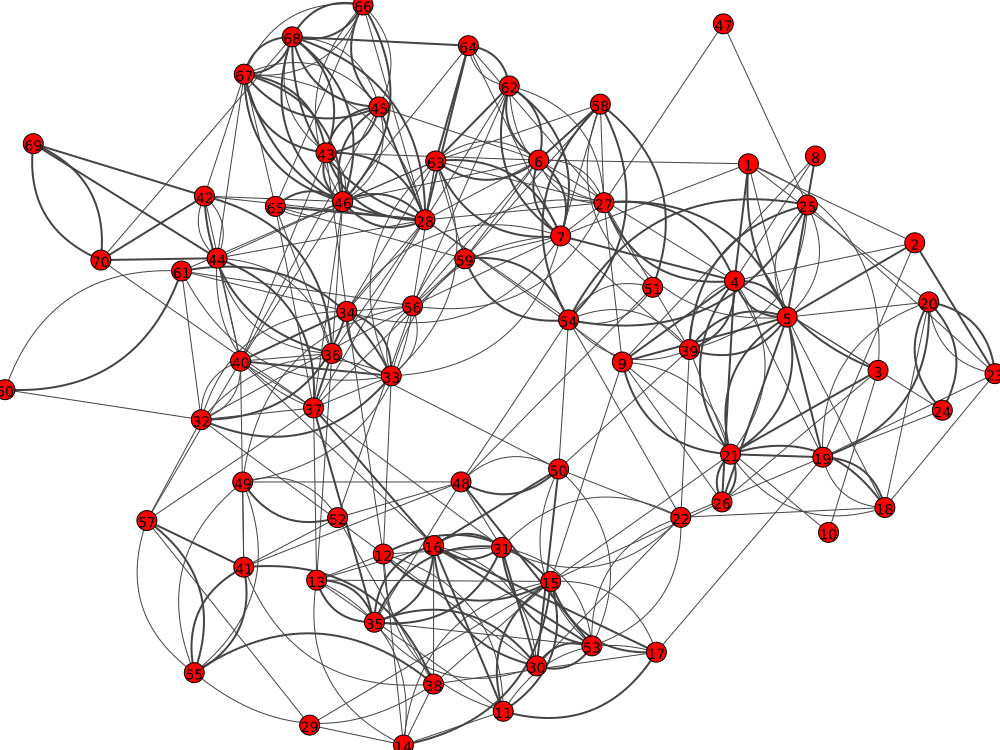

In [9]:
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label"] = range(1, 71)
visual_style["layout"] = g.layout("kk")
visual_style["bbox"] = (1000, 750)
visual_style["margin"] = 5
visual_style["edge_arrow_size"] = 0.6
visual_style["edge_width"] = g.es["weight"]

plot(g, **visual_style)

# Degree Centrality

In [10]:
degrees = g.degree(range(g.vcount()), mode=ALL, loops=True)
inDegrees = g.degree(range(0,g.vcount()), mode=IN, loops=True)
outDegrees = g.degree(range(0,g.vcount()), mode=OUT, loops=True)
totalDegree = sum(degrees)
degreeCentrality = []
degreeCentrality[:] = [x/totalDegree for x in degrees]
print("Max degree Centrality Node :", degreeCentrality.index(max(degreeCentrality))+1, " Degree Centrality = ", max(degreeCentrality))

Max degree Centrality Node : 28  Degree Centrality =  0.031420765027322405


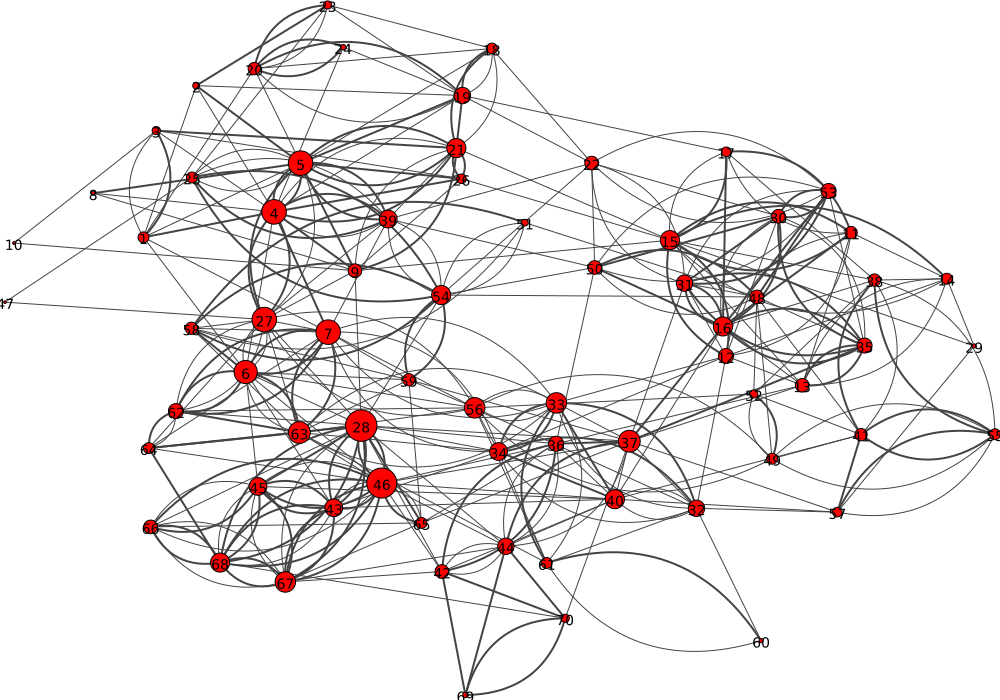

In [11]:
temp = [x*1000 for x in degreeCentrality]
visual_style = {}
visual_style["vertex_size"] = temp
visual_style["vertex_label"] = range(1, 71)
visual_style["layout"] = g.layout("kk")
visual_style["bbox"] = (1000, 700)
visual_style["margin"] = 5
visual_style["edge_arrow_size"] = 0.6
visual_style["edge_width"] = g.es["weight"]

plot(g, **visual_style)

# Eccentricity Centrality

In [12]:
eccentricities = g.eccentricity(vertices= range(g.vcount()), mode=ALL)
# radious = min(eccentricities)
radii = int(g.radius(mode=ALL))
centers = []
for i in range(g.vcount()):
    if eccentricities[i] == radii:
        centers.append(i+1)
print("Radius of the graph: ", radii, "\nCenters of the graph:", centers)

Radius of the graph:  3 
Centers of the graph: [27, 28]


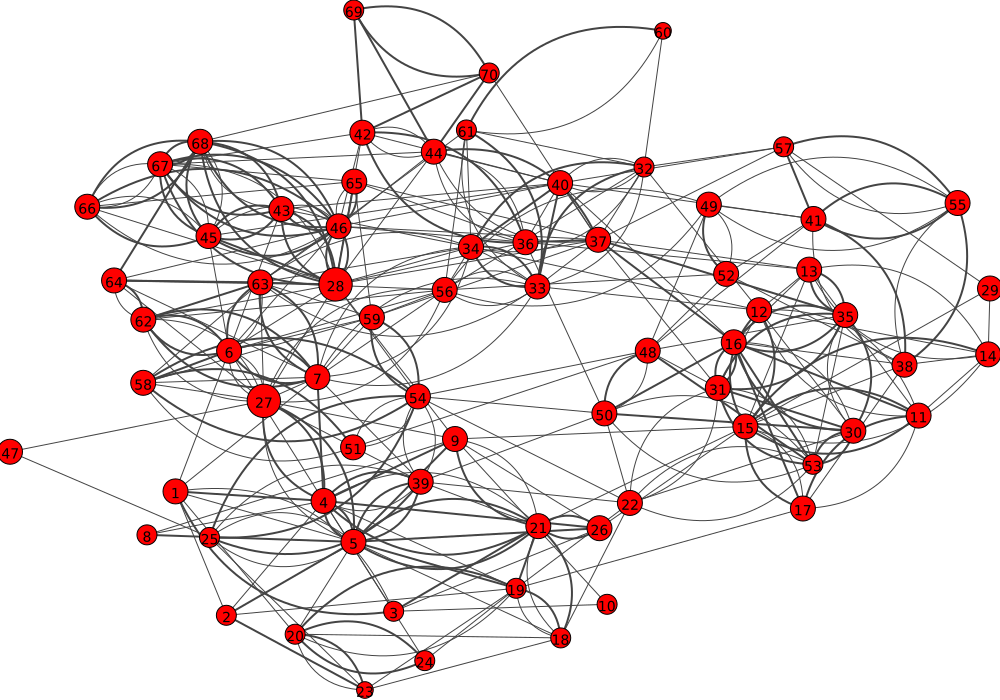

In [14]:
temp = [100/x for x in eccentricities]
visual_style = {}
visual_style["vertex_size"] = temp
visual_style["vertex_label"] = range(1, 71)
visual_style["layout"] = g.layout("kk")
visual_style["bbox"] = (1000, 700)
visual_style["margin"] = 10
visual_style["edge_arrow_size"] = 0.6
visual_style["edge_width"] = g.es["weight"]

plot(g, **visual_style)

   # Closeness Centrality

In [15]:
closeness = g.closeness(vertices = range(70), mode = ALL, cutoff = None, weights = 'weight' , normalized = True)
median = closeness.index(max(closeness))+1
print("Graph median :", median)
# print(closeness)

Graph median : 28


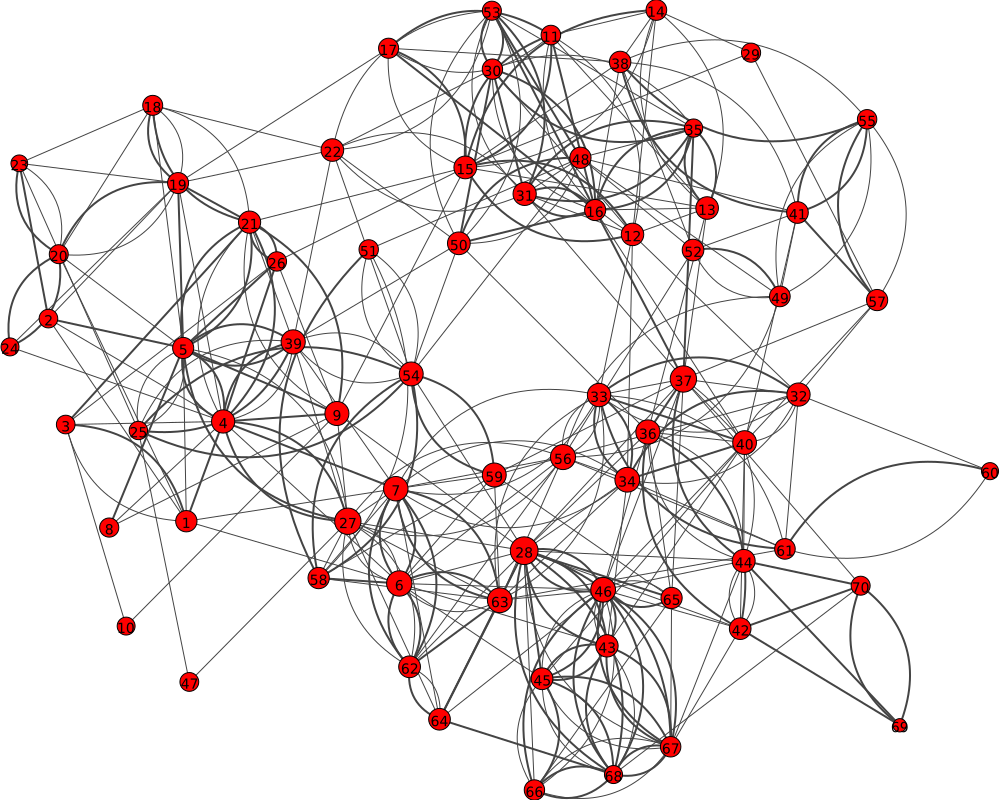

In [16]:
ver_sizes = [60*x for x in closeness]
visual_style = {}
visual_style["vertex_size"] = ver_sizes
visual_style["vertex_label"] = range(1, 71)
visual_style["layout"] = g.layout("kk")
visual_style["bbox"] = (1000, 800)
visual_style["margin"] = 10
visual_style["edge_arrow_size"] = 0.6
visual_style["edge_width"] = g.es["weight"]

plot(g, **visual_style)

  #  Radiality of the Graph

In [17]:
diameter = g.diameter(directed = True, unconn= True, weights = 'weight')
mat = g.shortest_paths(source=None, target=None, weights='weight', mode=ALL)
allPairShortestPath = np.array(mat)
distances = np.sum(allPairShortestPath, axis = 0)
radiality = []
for i in distances:
    radiality.append((70*diameter + 70 - i)/(69))
    
maxRad = max(radiality)
nodesWithMaxRadiality = []
for i in range(g.vcount()):
    if radiality[i] == maxRad:
        nodesWithMaxRadiality.append(i+1)
print('Nodes With Maximum Radiality :', nodesWithMaxRadiality)

Nodes With Maximum Radiality : [28]


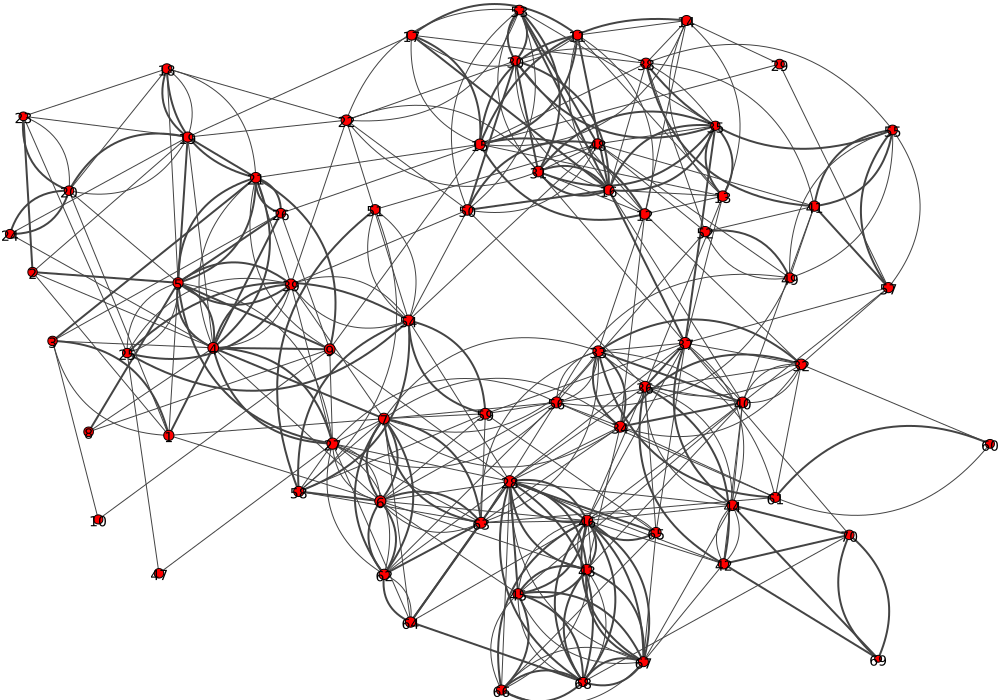

In [18]:
temp = [x/13*25 for x in radiality]
visual_style = {}
visual_style["vertex_size"] = temp
visual_style["vertex_label"] = range(1, 71)
visual_style["layout"] = g.layout("kk")
visual_style["bbox"] = (1000, 700)
visual_style["margin"] = 10
visual_style["edge_arrow_size"] = 0.6
visual_style["edge_width"] = g.es["weight"]

plot(g, **visual_style)

# Stress Centrality

In [19]:
#Stress Centraity for all Nodes
CStress = []
for vNode in range(70):
    count = 0
    shortestPaths = []
    for i in range(0, 70):
        paths = g.get_all_shortest_paths(i, to=None, weights='weight', mode=ALL)
        shortestPaths.append(paths)
    for ways in shortestPaths:
        for nodes in ways:
            if vNode in nodes:
                count += 1
    CStress.append(count)

In [20]:
stressedElement = CStress.index(max(CStress))+1
print("Maximum stress centrality element:", stressedElement)

Maximum stress centrality element: 27


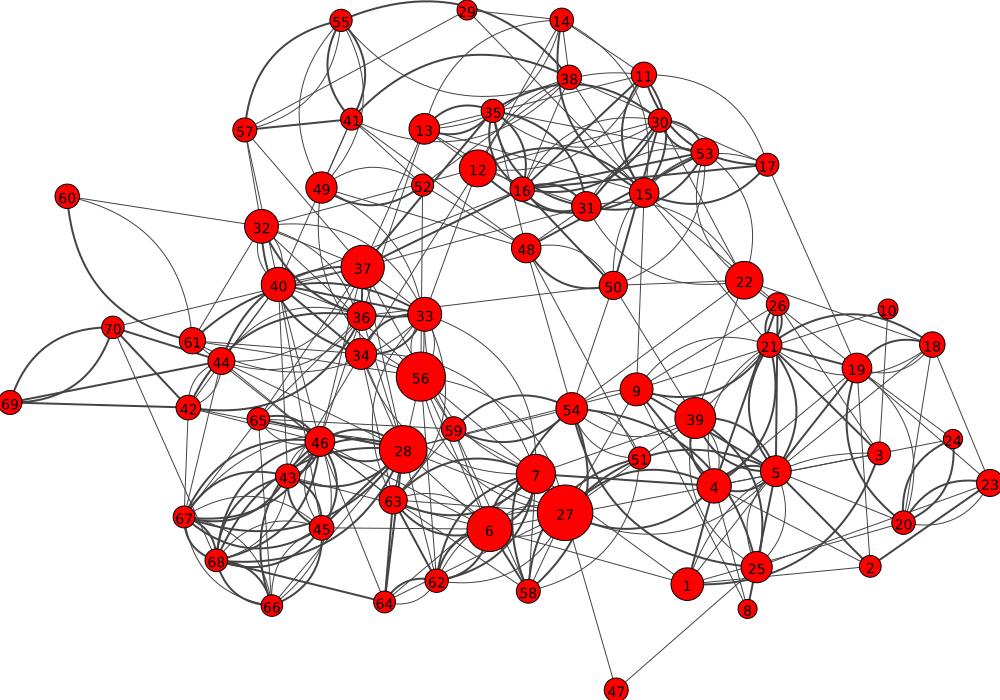

In [21]:
temp = [x/100 + 15 for x in CStress]
visual_style = {}
visual_style["vertex_size"] = temp
visual_style["vertex_label"] = range(1, 71)
visual_style["layout"] = g.layout("kk")
visual_style["bbox"] = (1000, 700)
visual_style["margin"] = 10
visual_style["edge_arrow_size"] = 0.6
visual_style["edge_width"] = g.es["weight"]

plot(g, **visual_style)

# Betweenness

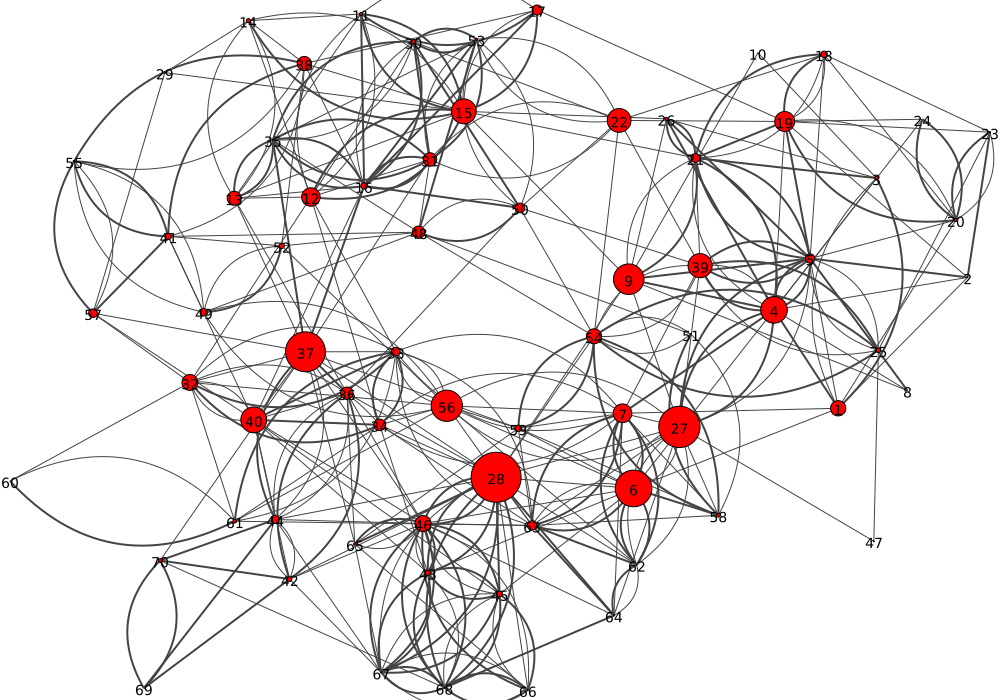

In [22]:
btw = g.betweenness(vertices= None, directed=True, cutoff=None, weights='weight', nobigint=True)

# Normalizing the betweenness values
amin, amax = min(btw), max(btw)
for i, val in enumerate(btw):
    btw[i] = (val-amin) / (amax-amin)

temp = [x*50 for x in btw]
visual_style = {}
visual_style["vertex_size"] = temp
visual_style["vertex_label"] = range(1, 71)
visual_style["layout"] = g.layout("kk")
visual_style["bbox"] = (1000, 700)
visual_style["margin"] = 10
visual_style["edge_arrow_size"] = 0.6
visual_style["edge_width"] = g.es["weight"]

plot(g, **visual_style)

# Closeness Vitality

In [23]:
def wienerIndex(g, vertex):
    close = g.closeness(vertices = vertex, mode = ALL, cutoff = None, weights = 'weight' , normalized = True)
    wiener = sum([1/x for x in close])
    return wiener

In [24]:
def closenessVitality(g):
    CV = []
    Iw = wienerIndex(g, range(70))
    for i in range(70):
        g_copy = g.copy()
        g_copy.delete_vertices(i)
        Iwx = wienerIndex(g_copy, range(g_copy.vcount()))
        CV.append(Iw - Iwx)
    return CV

CV = closenessVitality(g)
print("Node with maximum closeness vitality :", CV.index(max(CV))+1)

Node with maximum closeness vitality : 69


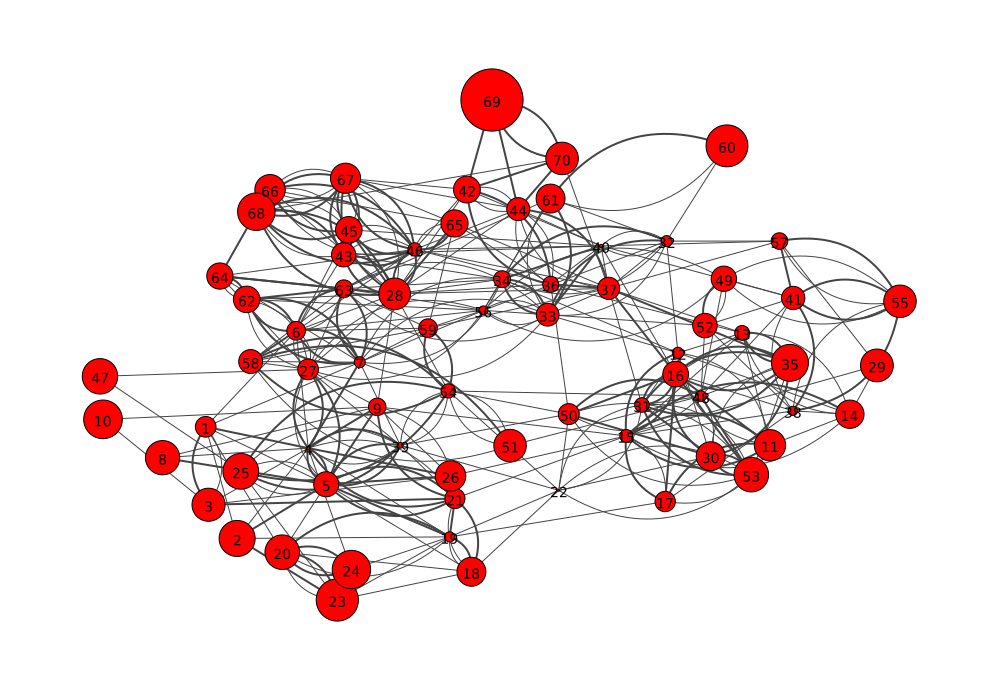

In [25]:
temp = [abs(x*10) for x in CV]
visual_style = {}
visual_style["vertex_size"] = temp
visual_style["vertex_label"] = range(1, 71)
visual_style["layout"] = g.layout("kk")
visual_style["bbox"] = (1000, 700)
visual_style["margin"] = 100
visual_style["edge_arrow_size"] = 0.6
visual_style["edge_width"] = g.es["weight"]

plot(g, **visual_style)